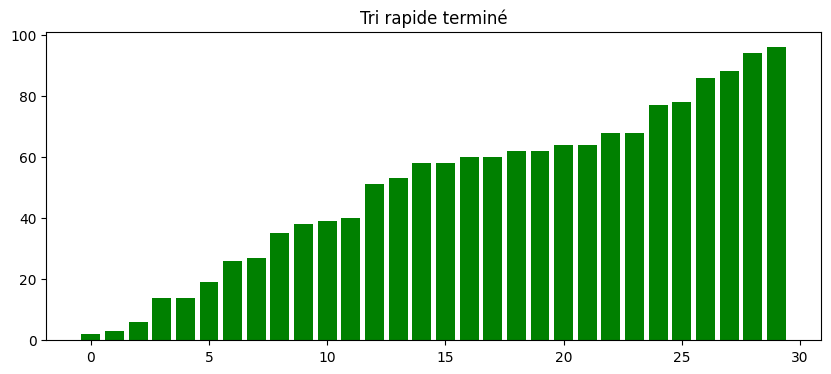

In [5]:
import matplotlib.pyplot as plt
import random
import time
from IPython.display import display, clear_output

def afficher(tab, couleurs=None, titre=""):
    clear_output(wait=True)
    plt.figure(figsize=(10, 4))
    if couleurs:
        plt.bar(range(len(tab)), tab, color=couleurs)
    else:
        plt.bar(range(len(tab)), tab)
    plt.title(titre)
    plt.pause(0.001)
    plt.close()

def tri_selection(tab):
    n = len(tab)
    for i in range(n):
        min_index = i
        for j in range(i + 1, n):
            if tab[j] < tab[min_index]:
                min_index = j
        tab[i], tab[min_index] = tab[min_index], tab[i]
        if i % 2 == 0:  # N'affiche qu'une itération sur 2 pour accélérer
            afficher(tab, ['green' if x <= i else 'blue' for x in range(n)], "Tri par sélection")
    afficher(tab, ['green'] * n, "Tri par sélection terminé")

def tri_insertion(tab):
    n = len(tab)
    for i in range(1, n):
        j = i
        while j > 0 and tab[j - 1] > tab[j]:
            tab[j], tab[j - 1] = tab[j - 1], tab[j]
            j -= 1
        if i % 2 == 0:
            afficher(tab, ['green' if x <= i else 'blue' for x in range(n)], "Tri par insertion")
    afficher(tab, ['green'] * n, "Tri par insertion terminé")

def tri_fusion(tab):
    def fusionner(tab, gauche, milieu, droite):
        L = tab[gauche:milieu+1]
        R = tab[milieu+1:droite+1]
        i = j = 0
        k = gauche
        while i < len(L) and j < len(R):
            if L[i] <= R[j]:
                tab[k] = L[i]
                i += 1
            else:
                tab[k] = R[j]
                j += 1
            if k % 2 == 0:
                afficher(tab, ['red' if x == k else 'blue' for x in range(len(tab))], "Tri par fusion")
            k += 1
        while i < len(L):
            tab[k] = L[i]
            if k % 2 == 0:
                afficher(tab, ['red' if x == k else 'blue' for x in range(len(tab))], "Tri par fusion")
            i += 1
            k += 1
        while j < len(R):
            tab[k] = R[j]
            if k % 2 == 0:
                afficher(tab, ['red' if x == k else 'blue' for x in range(len(tab))], "Tri par fusion")
            j += 1
            k += 1

    def tri_fusion_rec(tab, gauche, droite):
        if gauche < droite:
            milieu = (gauche + droite) // 2
            tri_fusion_rec(tab, gauche, milieu)
            tri_fusion_rec(tab, milieu + 1, droite)
            fusionner(tab, gauche, milieu, droite)

    tri_fusion_rec(tab, 0, len(tab) - 1)
    afficher(tab, ['green'] * len(tab), "Tri par fusion terminé")

def tri_rapide(tab):
    def partition(tab, low, high):
        pivot = tab[high]
        i = low - 1
        for j in range(low, high):
            if tab[j] <= pivot:
                i += 1
                tab[i], tab[j] = tab[j], tab[i]
                if j % 2 == 0:
                    afficher(tab, ['red' if x == i or x == j else 'blue' for x in range(len(tab))], "Tri rapide")
        tab[i + 1], tab[high] = tab[high], tab[i + 1]
        afficher(tab, ['red' if x == i + 1 or x == high else 'blue' for x in range(len(tab))], "Tri rapide")
        return i + 1

    def tri_rapide_rec(tab, low, high):
        if low < high:
            pi = partition(tab, low, high)
            tri_rapide_rec(tab, low, pi - 1)
            tri_rapide_rec(tab, pi + 1, high)

    tri_rapide_rec(tab, 0, len(tab) - 1)
    afficher(tab, ['green'] * len(tab), "Tri rapide terminé")

# Test
taille = 30
tab_origine = [random.randint(1, 100) for _ in range(taille)]

tab = tab_origine.copy()
tri_selection(tab)

tab = tab_origine.copy()
tri_insertion(tab)

tab = tab_origine.copy()
tri_fusion(tab)

tab = tab_origine.copy()
tri_rapide(tab)
